In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [41]:
df = pd.read_csv('E:/COADING/MachineLearning/DataSet/digit-recognizer/train.csv')

In [42]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
734,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2033,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9764,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32391,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12319,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


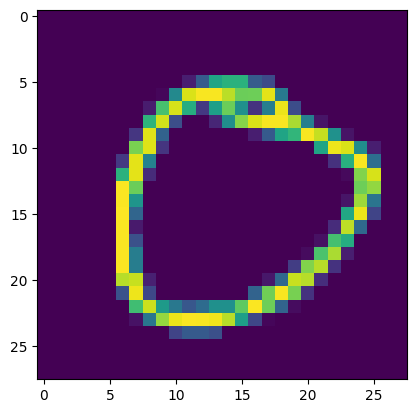

In [43]:
plt.imshow(df.iloc[15302, 1:].values.reshape(28, 28))

In [44]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [21]:
X_train.shape

(33600, 784)

In [22]:
X_test.shape

(8400, 784)

# Applying KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = knn.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, r2_score

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("R2 Score : ", r2_score(y_test, y_pred))

Accuracy Score :  0.9651190476190477
R2 Score :  0.920882306748663


# PCA

## S1 : StandardScaler

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [48]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [51]:
X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
X_test_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## S2 : PCA

In [78]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA(n_components=200)

In [106]:
X_train_trans = pca.fit_transform(X_train_scaled)
X_test_trans = pca.transform(X_test_scaled)

In [107]:
X_train_trans.shape

(33600, 3)

In [108]:
X_test_trans.shape

(8400, 3)

In [109]:
knn_trf = KNeighborsClassifier()

In [110]:
knn_trf.fit(X_train_trans, y_train)

KNeighborsClassifier()

In [111]:
y_pred_trans = knn_trf.predict(X_test_trans)

In [112]:
print("Accuracy Score : ", accuracy_score(y_test, y_pred_trans))
print("R2 Score : ", r2_score(y_test, y_pred_trans))

Accuracy Score :  0.5117857142857143
R2 Score :  0.17635131064731924


In [113]:
for i in range(1, 10): # X_train.shape[1]
    pca = PCA(n_components=i)
    
    X_train_trans = pca.fit_transform(X_train_scaled)
    X_test_trans = pca.transform(X_test_scaled)

    knn_trf = KNeighborsClassifier()
    knn_trf.fit(X_train_trans, y_train)
    y_pred_trans = knn_trf.predict(X_test_trans)
    print(i)
    print("Accuracy Score : ", accuracy_score(y_test, y_pred_trans), ",  R2 Score : ", r2_score(y_test, y_pred_trans))


1
Accuracy Score :  0.25535714285714284 ,  R2 Score :  -0.5383280042327003
2
Accuracy Score :  0.3233333333333333 ,  R2 Score :  -0.2209981900411273
3
Accuracy Score :  0.5117857142857143 ,  R2 Score :  0.17635131064731924
4
Accuracy Score :  0.6726190476190477 ,  R2 Score :  0.3957647469623281
5
Accuracy Score :  0.7376190476190476 ,  R2 Score :  0.49378134631061854
6
Accuracy Score :  0.8229761904761905 ,  R2 Score :  0.6114127194110501
7
Accuracy Score :  0.8392857142857143 ,  R2 Score :  0.6615091379210805
8
Accuracy Score :  0.8679761904761905 ,  R2 Score :  0.7198093997595612
9
Accuracy Score :  0.8813095238095238 ,  R2 Score :  0.7433900803214417


# Visualization

## 2D

In [132]:
pca = PCA(n_components=2)
    
X_train_trans = pca.fit_transform(X_train_scaled)
X_test_trans = pca.transform(X_test_scaled)

In [116]:
X_train_trans

array([[-0.84756762,  1.7467536 ],
       [-2.2090181 , -5.3966156 ],
       [-4.19081635,  0.60897468],
       ...,
       [ 4.46291537, -0.63837679],
       [-4.5016082 , -1.19691725],
       [ 0.11943076,  0.96090267]])

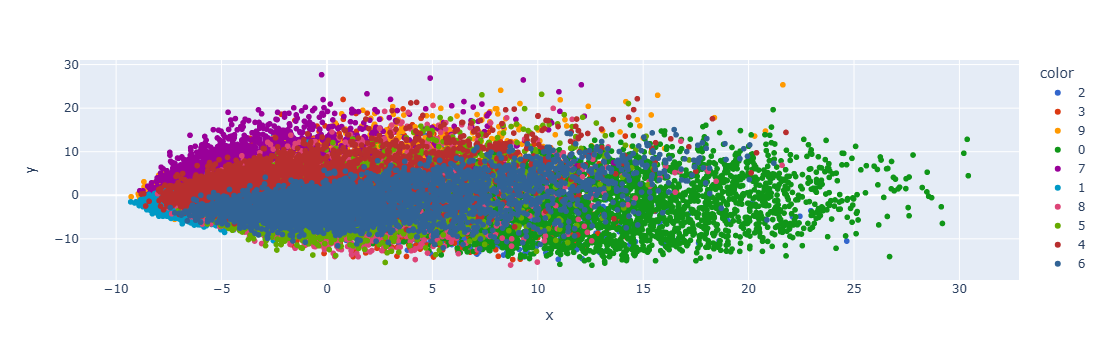

In [117]:
import plotly.express as px
y_train_trans = y_train.astype(str)

fig = px.scatter(x=X_train_trans[:,0], 
                 y=X_train_trans[:,1],
                color=y_train_trans,
                color_discrete_sequence = px.colors.qualitative.G10
                )

fig.show()


## 3D

In [135]:
pca = PCA(n_components=3)
    
X_train_trans = pca.fit_transform(X_train_scaled)
X_test_trans = pca.transform(X_test_scaled)

In [136]:
X_train_trans

array([[-0.84756762,  1.7467536 ,  5.42085949],
       [-2.2090181 , -5.3966156 ,  1.87038904],
       [-4.19081635,  0.60897468,  6.87752512],
       ...,
       [ 4.46291537, -0.63837679,  4.81249498],
       [-4.5016082 , -1.19691725, -2.75720106],
       [ 0.11943076,  0.96090267, -1.35292383]])

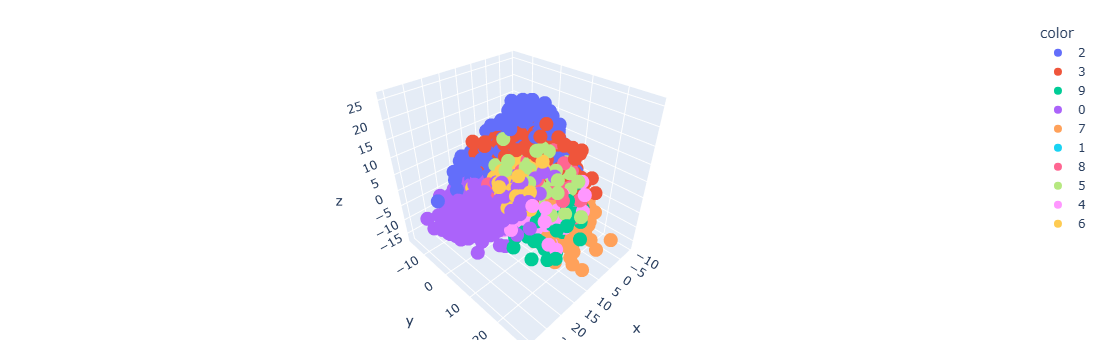

In [129]:
y_train_trans = y_train.astype(str)

fig = px.scatter_3d(x=X_train_trans[:,0], 
                     y=X_train_trans[:,1],
                     z=X_train_trans[:,2],
                    color=y_train_trans,
                )

fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))

fig.show()


### Eigen Values

In [137]:
pca.explained_variance_

array([40.71663636, 29.14088312, 26.81721425])

### Eigen Vectors

In [138]:
pca.components_

array([[-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.]])